In [1]:
# import lib
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import ipywidgets as widgets
import random

## Assignment 1

Hi everyone,

Below, you will find coding blocks with **placeholders** or **empty sections** for you to fill in

### How to complete the assignment:
*   Read the **comments** in each block carefully and follow the steps to complete the code.
*   ❗❗**DO NOT MODIFY** any existing code unless there's a **clear instruction** to do so.❗❗
    * You may safely delete the text **"YOUR CODE GOSE HERE"** and replace it with your solution.   
*   If you accidentally delete a code block and save the file, **re-download the notebook** and refer to the guide.
*   When finished, run **all cells** to confirm that everything executes correctly and that **no errors** occur.

### Submission Instruction
1.   Click **' Run '** in the top menu.
2.   Select **' Restart Kernel and Run All Cell... '** to make sure your notebook runs from start to finish without errors.
3.   Click **' File ' --> ' Save Notebook '** (or press **CMD/CTRL + S**)
4.   Upload the completed notebook to **Canvas**.

## Load an Audio File

In [2]:
# Provide a file path and use librosa.load to load an audio file (of your choice:)) at sample rate 48000Hz
# see https://librosa.org/doc/main/generated/librosa.load.html


# YOUR CODE GOSE HERE
filename = 'audio_a1/125_bounce.wav'
y, sr = librosa.load(filename, sr = 48000)

## Plot the Loaded Audio File

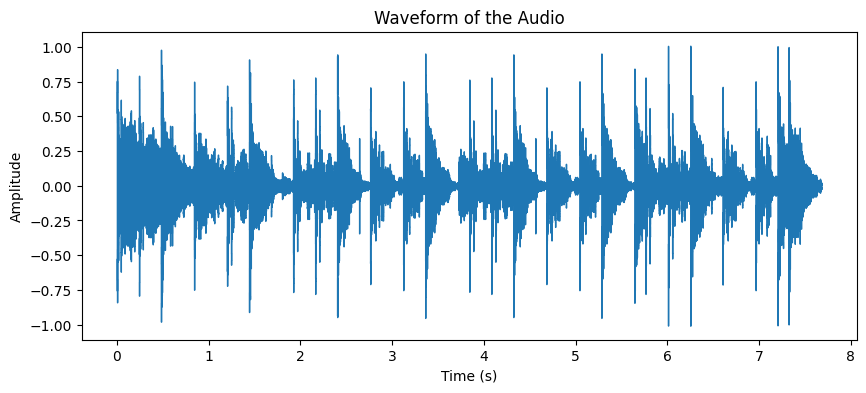

In [3]:
# Great, now, plot the waveform, using librosa.display.waveshow:)
# see: https://librosa.org/doc/main/generated/librosa.display.waveshow.html

plt.figure(figsize=(10, 4))



# YOUR CODE GOES HERE
librosa.display.waveshow(y, sr=sr)


plt.title("Waveform of the Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


## Compute and Plot Zero-Crossing Rate (ZCR)

In [4]:
# Compute the Zero Crossing Rate using librosa.feature.zero_crossing_rate
# see: https://librosa.org/doc/main/generated/librosa.feature.zero_crossing_rate.html

# YOUR CODE GOES HERE
zcr = librosa.feature.zero_crossing_rate(y, frame_length=2048, hop_length=512, center=True)
print(zcr.shape)

(1, 721)


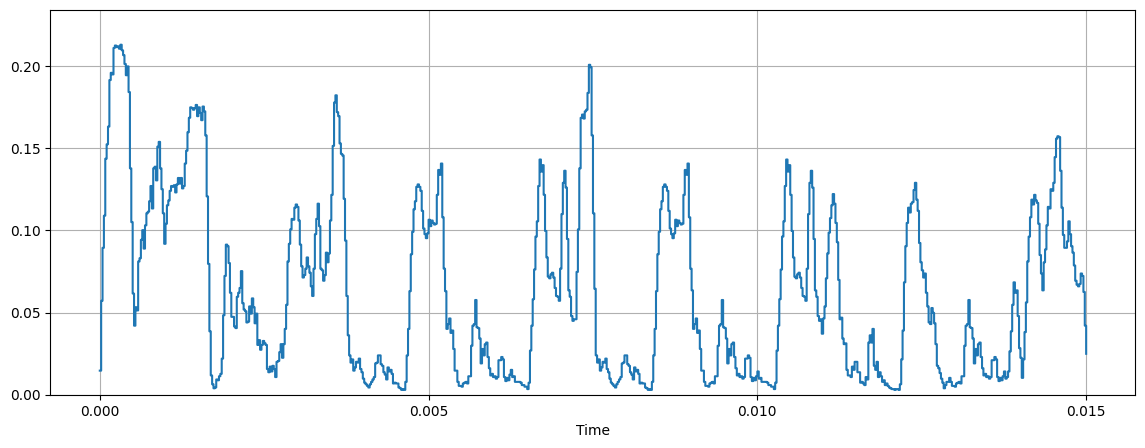

In [5]:
# Great, now, lets visualize the zero crossing rate
# Use librosa.display.waveshow


# YOUR CODE GOES HERE
plt.figure(figsize=(14, 5))
librosa.display.waveshow(zcr, sr=sr)
plt.ylim(bottom=0)
plt.grid(True)

## Compute and Plot RMS Energy

In [6]:
# Compute the RMS Energy
# see: https://librosa.org/doc/main/generated/librosa.feature.rms.html

# YOUR CODE GOES HERE
rms = librosa.feature.rms(y=y, frame_length=2048, hop_length=512, center=True)
print(rms.shape)

(1, 721)


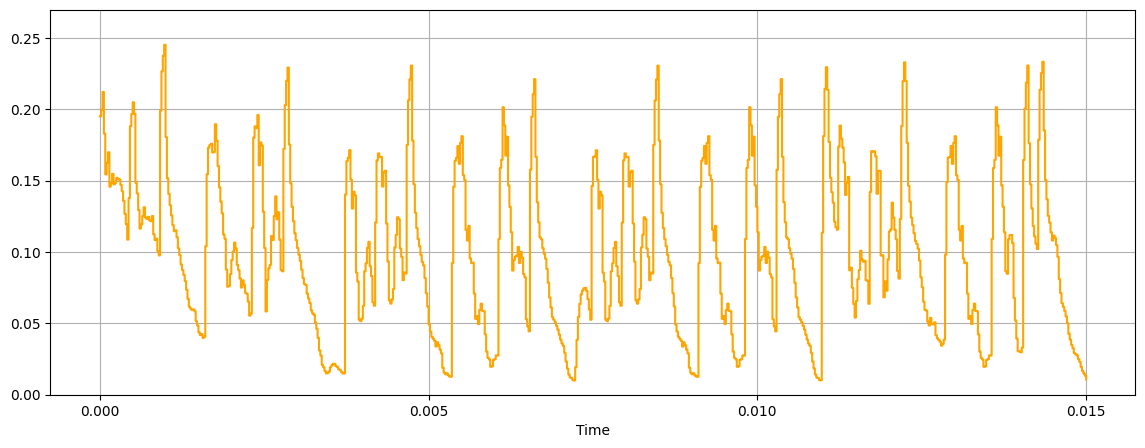

In [7]:
# Great, now, lets visualize the RMS Energy
# Use librosa.display.waveshow


# YOUR CODE GOES HERE
plt.figure(figsize=(14,5))
librosa.display.waveshow(rms, sr=sr, color='orange')
plt.ylim(bottom=0)
plt.grid(True)

## Experiment with Different `hop_length`

(1, 361)
(1, 361)


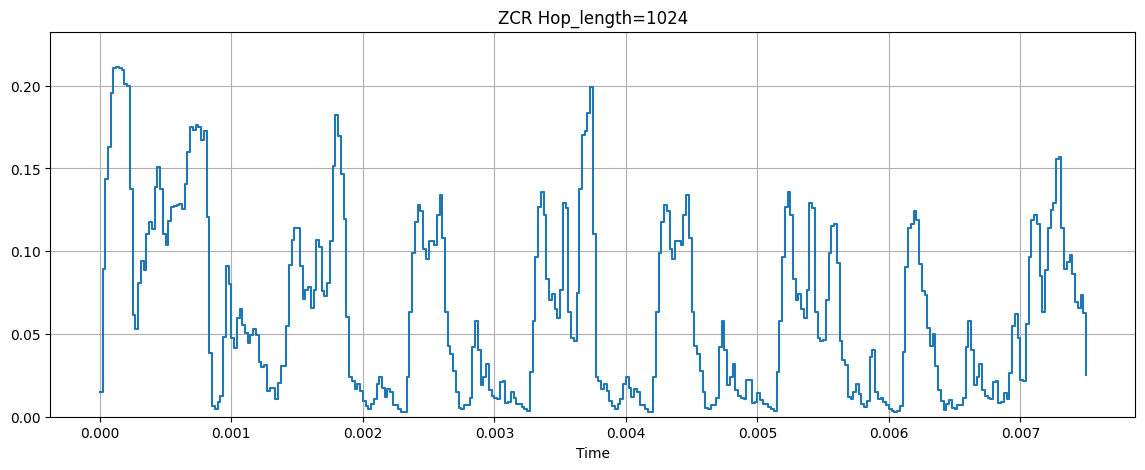

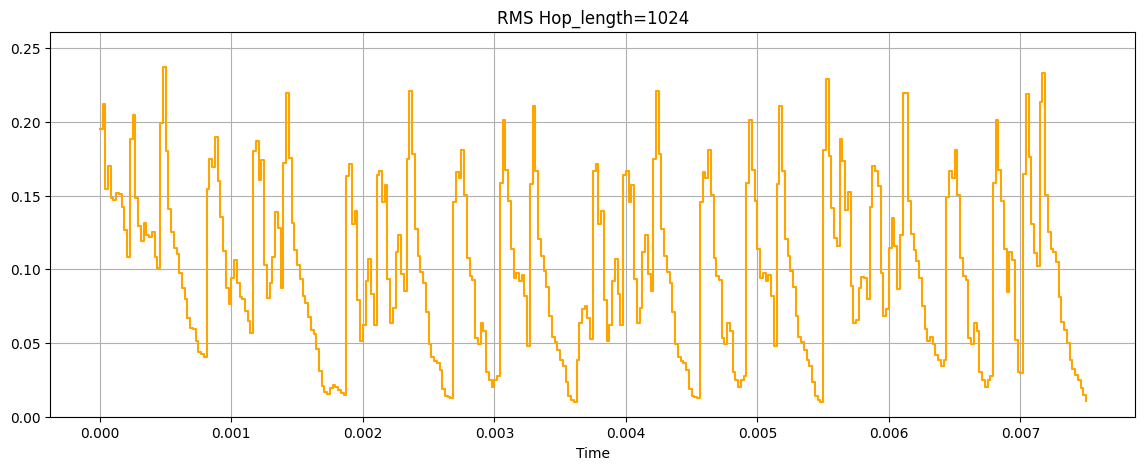

In [8]:
# Now, try with a different hop_length with BOTH ZCR & RMS Energy


# YOUR CODE GOES HERE
zcr_1 = librosa.feature.zero_crossing_rate(y, frame_length=2048, hop_length=1024, center=True)
print(zcr_1.shape)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(zcr_1, sr=sr)
plt.ylim(bottom=0)
plt.title("ZCR Hop_length=1024")
plt.grid(True)

rms_1 = librosa.feature.rms(y=y, frame_length=2048, hop_length=1024)
print(rms_1.shape)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(rms_1, sr=sr, color='orange')
plt.title("RMS Hop_length=1024")
plt.ylim(bottom=0)
plt.grid(True)

## Creative Challenge 1

Please read the instructions carefully and complete the code blocks below.

### Context:
In this challenge, you will build a random audio slicing tool using basic audio features.

You will:
* Load an audio file
* Extract **zero-crossing rate (ZCR)** and **RMS Energy** over time.
* Use thresholds to decide which parts of the audio to keep
* Slice, shuffle, and stitch those audio segments together.
* Display the newly generated audio result

This challenge is designed to explore how audio features can drive creative transformations, not just analysis.

In [9]:
# Load audio and compute duration

# Specify your own audio path: I was using the 125_bounce.wav from the 'audio' folder, sounds pretty sick :))
audio_path = 'audio_a1/latin_groove.mp3'   # YOUR CODE GOES HERE


# Load Audio (uncomment after specifying your audio path)
y, sr = librosa.load(audio_path, mono=True)


# Compute the total duration in SECONDS
# USE 'duration_sec' variable name as you will re-use it later
duration_sec = librosa.get_duration(y=y, sr=sr) # YOUR CODE GOES HERE


# UNCOMMENT BELOW TO SEE THE RESULTS
print("Sample rate:", sr)
print("Number of samples:", len(y))
print("Duration (seconds):", round(duration_sec, 2))
ipd.display(ipd.Audio(y, rate=sr))

Sample rate: 22050
Number of samples: 393984
Duration (seconds): 17.87


In [10]:
# Specify feature extraction parameters
# I'm using 2048 & 512 for both features, but you can experiment with other settings.
frame_length = 2048
hop_length = 512


# Compute ZCR & RMS
# Use:
# 1. librosa.feature.zero_crossing_rate & librosa.feature.rms
# 2. frame_length & hop_length, specified above
zcr = librosa.feature.zero_crossing_rate(y, frame_length=frame_length, hop_length=hop_length, center=True) # YOUR CODE GOES HERE
rms = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length) # YOUR CODE GOES HERE

# Check frames if you want
print("Number of frames (zcr):", len(zcr))
print("Number of frames (rms):", len(rms))

Number of frames (zcr): 1
Number of frames (rms): 1


In [11]:
# Complete the helper function below:


# Convert time(s) into frame index
def time_to_frame_idx(t_sec, sr, hop_length, num_frames):
    """
    Convert the input time(s) into frame index
    Params:
        t_sec: time in seconds
        sr: sample rate
        hop_length: distance between each 
        num_frames: total number of frames
    Return:
        frame_idx: frame index
    """

    # YOUR CODE GOES HERE
    frame_idx = int(t_sec * sr / hop_length)

    if frame_idx < 0:
        frame_idx = 0;
    elif frame_idx >= num_frames:
        frame_idx = num_frames - 1
        
    return frame_idx

# IMPORTANT: UNCOMMENT BELOW & RUN THE TEST CASES BELOW BEFORE MOVEING FORWARD
# IF YOU GOT AN "AssertionError: " THAT MEANS THERE'S BUGS IN YOU FUNCTION LOL, HAVE FUN >ᴗ<

test_sr = 48000
test_hop_length = 480
test_num_frames = 100

# # Test Cases:
# # test case 1: start of the audio
assert time_to_frame_idx(0.0, test_sr, test_hop_length, test_num_frames) == 0.0

# # test case 2: time inside normal range
assert time_to_frame_idx(0.25, test_sr, test_hop_length, test_num_frames) == 25 # frame_idx ≈ (0.25 * 48000) / 480 = 25

# # test case 3: time exactly at last valid frame
last_t = (test_num_frames - 1) * test_hop_length / test_sr
assert time_to_frame_idx(last_t, test_sr, test_hop_length, test_num_frames) == 99 # should be last frame, valid frame indices: 0 → 99

# # test case 4: beyond audio range
assert time_to_frame_idx(10000000, test_sr, test_hop_length, test_num_frames) == 99 # should give the last frame

# # test case 5: negative time
assert time_to_frame_idx(-1.0, test_sr, test_hop_length, test_num_frames) == 0 # should give the first frame


In [12]:
# Complete the helper function below:))


# Slice a short audio segment given a start time and duration
def slice_audio(y, sr, start_sec, slice_sec):
    """
    Slice a short segment from the audio signal.

    Params:
        y: 1D audio signal (numpy array)
        sr: sample rate
        start_sec: start time in seconds
        slice_sec: length of the slice in seconds

    Return:
        y_slice: sliced audio segment
    """

    # 1. Convert start_sec and slice_sec from seconds to sample indices
    # 2. Make sure start and end indices do not go out of bounds
    # 3. Return the sliced portion of the audio array

    # YOUR CODE GOES HERE
    start = int(start_sec * sr)
    s = int(slice_sec * sr)
    end = start + s
    
    if start < 0:
        return np.array([])

    if start >= len(y):
        return np.array([])

    end = min(end,len(y))
    y_slice = y[start:end]
    
    return y_slice


# IMPORTANT: UNCOMMENT BELOW & RUN THE TEST CASES BELOW BEFORE MOVEING FORWARD
# IF YOU GOT AN "AssertionError: " THAT MEANS THERE'S BUGS IN YOU FUNCTION, GOOD LUCK ( ≖‿  ≖ )Heehee

test_sr = 48000
test_y = np.zeros(sr * 2)  # 2 seconds of fake audio

# # Test Cases:
# # test case 1: normal slice inside of the bounds
snip = slice_audio(test_y, test_sr, start_sec=0.5, slice_sec=0.2)
assert len(snip) == int(test_sr * 0.2)

# # test case 2: slice beyond end
snip = slice_audio(test_y, test_sr, start_sec=1.9, slice_sec=0.5)
assert len(snip) <= int(0.5 * test_sr)

# # test case 3: negative start
snip = slice_audio(test_y, test_sr, start_sec=-0.5, slice_sec=0.2)
assert len(snip) == 0

# # test case 4: start at beyond audio end
snip = slice_audio(test_y, test_sr, start_sec=3.0, slice_sec=0.2)
assert len(snip) == 0

In [13]:
# Now, finally, time to write it together (˵ ¬ᴗ¬˵)
# The code below should follows the step:
    # 1. Define settings
    # 2. Normalize zcr & rms (i'll write this for yall)
    # 3. Loop through time (seconds)
        # 1. clamp time, so we not slip out-of-bounds
        # 2. convert time -> frame idx
        # 3. feature rule: decide whether to keep this snippet
            # 1. slice audio
            # 2. randomly reverse some snippets
            # 3. append snippet
    # 4. Shuffle snippets
    # 5. Stich + play


# 1. Define settings (change if you want)
snippet_sec = 0.20 # length of audio snippet
reverse_prob = 0.20 # prob of reverse samples
step_sec = 0.05 # time (s) to advance


# 2. Normalize zcr & rms (uncomment, and change the variable name if needed)
zcr_norm = (zcr - zcr.min()) / (zcr.max() - zcr.min() + 1e-12)
rms_norm = (rms - rms.min()) / (rms.max() - rms.min() + 1e-12)


snippets = []



# 3. Loop through time (seconds)
for t in np.arange(0.0, max(0.0, duration_sec - snippet_sec), step_sec):
    
    # 1. clamp time, so we not slip out-of-bounds, HINT: use np.clip
    t = np.clip(t, 0.0, duration_sec - snippet_sec) # YOUR CODE

    # 2. convert time -> frame idx (user helper func)
    frame_idx = time_to_frame_idx(t, sr, hop_length, zcr.shape[1]) # YOUR CODE

    # 3. feature rule: decide whether to keep this snippet, your own rule
    z = zcr_norm[0, frame_idx]   
    r = rms_norm[0, frame_idx] 
    #if zcr_norm[0, frame_idx] > 0.3 and rms_norm[0, frame_idx] > 0.3: 
    if z / (r + 0.0001) > .17221:# YOUR CODE: write a condition using zcr_norm and rms_norm

        # 1. slice audio (user helper func)
        y_snip = slice_audio(y, sr, start_sec=t, slice_sec=snippet_sec) # YOUR CODE

        # 2. randomly reverse some snippets
        # HINT: use random
        if random.random() < reverse_prob:
            y_snip = y_snip[::-1] # YOUR CODE: reverse the snippet with probability reverse_prob

        # 3. append snippet
        snippets.append(y_snip)


# 4. Shuffle snippets
# YOUR CODE: shuffle the snippets list
# HINT: use random shuffle
random.shuffle(snippets)



# 5. Stich + play (uncomment)
if len(snippets) == 0:
     print("No snippets selected.")
else:
     y_random = np.concatenate(snippets)
     ipd.display(ipd.Audio(y_random, rate=sr))


## Creative Challenge 2

Please read the instructions carefully and complete the code blocks below.

### Context:
In this challenge, you will build a feature-based sampler. You will build upon the previous challenge and reuse functions.

You will:
* Divide snippets into bins:
    * quiet / medium / loud (RMS)
    * smooth / noisy (ZCR)
* Randomly draw snippets from one bin only
* Stitch them into a new audio

In [14]:
# Helper functions: complete ONLY the 2nd one: quantile_bins() :))

def normalize_01(x):
    """
    Normalize a 1D numpy array to [0, 1].
    """
    x = np.asarray(x)
    return (x - x.min()) / (x.max() - x.min() + 1e-12)

# COMPLETE THIS ONE
def quantile_bins(x_norm, q1=0.33, q2=0.66):
    """
    Convert normalized values into 3 bins using fixed cutpoints (default thirds).
    Returns an int array in {0,1,2}.
      0 = low, 1 = mid, 2 = high
    """
    
    # TODO: create an int array bins same length as x_norm, HINT: use np.asarray() on x_norm
    # TODO: create bins, HINT: use np.zeros_like()
    # TODO: set bins to 1 where x_norm >= q1
    # TODO: set bins to 2 where x_norm >= q2
    # YOUR CODE GOES HERE
    x_norm = np.asarray(x_norm)
    bins = np.zeros_like(x_norm, dtype=int)

    bins[x_norm >= q1] = 1
    bins[x_norm >= q2] = 2
    
    return bins


def bin_name_3level(b, labels=("quiet", "medium", "loud")):
    """
    Convert a 3-level bin index into a string label.

    Params:
        b: bin index (0, 1, or 2)
        labels: tuple of labels corresponding to each bin

    Return:
        label: string name for the bin
    """
    return labels[int(b)]


def bin_name_2level(b, labels=("smooth", "noisy")):
    """
    Convert a 2-level bin index into a string label.

    Params:
        b: bin index (0 or 1)
        labels: tuple of labels corresponding to each bin

    Return:
        label: string name for the bin
    """
    return labels[int(b)]

In [15]:
# Complete BOTH helper functions


def build_feature_sampler_library(
    y, sr, zcr, rms, hop_length,
    snippet_sec=0.20,
    step_sec=0.05,
    zcr_split=0.5,          # threshold in normalized space to split smooth/noisy
    rms_q1=0.33, rms_q2=0.66 # thresholds in normalized space to split quiet/med/loud
):
    """
    Build a library of snippets categorized by:
      - RMS bins: quiet/medium/loud (3 levels)
      - ZCR bins: smooth/noisy (2 levels)

    Returns:
      library: dict mapping (rms_label, zcr_label) -> list of snippets (numpy arrays)
      info: dict with useful debug stats (for debugging)
    """

    
    # TODO 1: normalize zcr and rms to [0,1], HINT: use helper normalize_01()
    zcr_norm = normalize_01(zcr) # YOUR CODE
    rms_norm = normalize_01(rms) # YOUR CODE

    
    # Bin labels (by frame)
    # TODO 2: create RMS bins (0/1/2) using quantile_bins (use helper quantile_bins())
    # TODO 3: create ZCR bins (0/1) using zcr_split threshold
    rms_bins = quantile_bins(rms_norm, q1=rms_q1, q2=rms_q2)  # YOUR CODE
    zcr_bins = (zcr_norm >= zcr_split).astype(int)  # YOUR CODE

    
    # Define library keys (DO NOT MODIFY IF YOU'RE UNSURE WHAT YOU DOING LOL, otherwise HAVE FUN WITH IT!!!)
    rms_labels = ("quiet", "medium", "loud")
    zcr_labels = ("smooth", "noisy")
    library = {(r, z): [] for r in rms_labels for z in zcr_labels}

    
    # TODO 4: loop over time from 0 to duration-snippet_sec in steps of step_sec
    # Literally the same as before, but you write it ;)
    times = np.arange(0.0, max(0.0, duration_sec - snippet_sec), step_sec)  # YOUR CODE
    for t in times:        # YOUR CODE


        # TODO 4.1: convert time -> frame_idx (user helper func) 
        frame_idx = time_to_frame_idx(t, sr, hop_length, zcr.shape[1])   # YOUR CODE

        
        # TODO 4.2: decide rms_label and zcr_label (user helper func) 
        r_label = rms_labels[int(rms_bins[0, frame_idx])]     # YOUR CODE
        z_label = zcr_labels[int(zcr_bins[0, frame_idx])]    # YOUR CODE

        
        # TODO 4.3: slice audio (helper) and add to library
        snip = slice_audio(y, sr, start_sec=t, slice_sec=snippet_sec)       # YOUR CODE
        if len(snip) == 0:
            continue
        library[(r_label, z_label)].append(snip)

    
    # Debug stats
    info = {
        "num_times": len(times),
        "snippet_sec": snippet_sec,
        "step_sec": step_sec,
        "counts": {k: len(v) for k, v in library.items()},
        "zcr_split": zcr_split,
        "rms_q1": rms_q1,
        "rms_q2": rms_q2,
    }
    return library, info


def sample_from_bin(library, target_rms="loud", target_zcr="noisy", n_picks=40, seed=7, reverse_prob=0.2):
    """
    Randomly draw snippets from one bin only, optionally reversing some,
    and stitch into one output array.

    Returns:
      y_out (numpy array)
    """
    
    # TODO 1: get the snippet pool for (target_rms, target_zcr), HINT: set key (, ) then use .get()
    key = (target_rms, target_zcr)         # YOUR CODE
    pool = library.get(key, [])       # YOUR CODE

    
    # TODO 2: if empty, return empty array
    if len(pool) == 0:
        return np.array([])     # YOUR CODE

    
    # TODO 3: set random seed for reproducibility
    # YOUR CODE GOES HERE
    random.seed(seed)
    
    # TODO 4: randomly choose n_picks snippets (with replacement)
    chosen = random.choices(pool, k=n_picks)     # YOUR CODE

    processed = []

    # TODO 5: reverse each chosen snippet with probability reverse_prob, same as previous challenge
    for snip in chosen:
        
        if random.random() < reverse_prob:
            snip = snip[::-1]
        
        # random reverse
        processed.append(snip)

    return np.concatenate(processed)

In [16]:
# Final let's play it 
# 1. not really anything for you to write here, but you can play with the target_rms & target_zcr
# 2. RUN when you finished writing everything above, or you will get errors
# Makesure you already have: y, sr, zcr, rms, hop_length (from previous challenge)


# 1. Define settings
snippet_sec = 0.20
step_sec = 0.05

target_rms = "medium"    # Pick one: "quiet" | "medium" | "loud"
target_zcr = "smooth"   # Pick one: "smooth" | "noisy"

# 2. Build Lib
library, info = build_feature_sampler_library(
    y=y, sr=sr, zcr=zcr, rms=rms, hop_length=hop_length,
    snippet_sec=snippet_sec, step_sec=step_sec,
    zcr_split=0.5,   # 0/1 on zcr
    rms_q1=0.33, rms_q2=0.66
)

# 3. Debug Info
print("Library counts (snippets per bin):")
for k, c in info["counts"].items():
    print(" ", k, "->", c)

# 4. Sample
y_out = sample_from_bin(
    library,
    target_rms=target_rms,
    target_zcr=target_zcr,
    n_picks=50,
    seed=7,
    reverse_prob=0.2
)

# 5. Play Audio
if len(y_out) == 0:
    print(f"No snippets found in bin {(target_rms, target_zcr)}. Try another bin or adjust thresholds.")
else:
    print("Output duration (sec):", round(len(y_out) / sr, 2))
    ipd.display(ipd.Audio(y_out, rate=sr))

Library counts (snippets per bin):
  ('quiet', 'smooth') -> 182
  ('quiet', 'noisy') -> 6
  ('medium', 'smooth') -> 107
  ('medium', 'noisy') -> 36
  ('loud', 'smooth') -> 6
  ('loud', 'noisy') -> 17
Output duration (sec): 10.0
